<a href="https://colab.research.google.com/github/EronDS/Neural-Networks/blob/main/Neural-Networks/CNNs/Images/Face_Recognition/Mask/Face_Detection_Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### **Dependecies**

In [1]:
!pip install mtcnn

##### **Importing Libraries**

In [51]:
import cv2 
import numpy as np 
from google.colab.patches import cv2_imshow 
from PIL import Image
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, Model
import mtcnn
from mtcnn.mtcnn import MTCNN
from keras.layers import Dense,Conv2D,Flatten,Dropout,Activation, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler
from tensorflow.keras.applications import ResNet50, VGG16, VGG19, InceptionV3, InceptionResNetV2, ResNet101
import math 
import warnings 
from keras.optimizers import Adam
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
train = '/content/drive/MyDrive/Datasets/opencv/Face Mask Dataset/Train'
test = '/content/drive/MyDrive/Datasets/opencv/Face Mask Dataset/Test'
validation = '/content/drive/MyDrive/Datasets/opencv/Face Mask Dataset/Validation'

In [4]:
train_imgs_mask = ['/content/drive/MyDrive/Datasets/opencv/Face Mask Dataset/Train/WithMask/{}'.format(i) for i in os.listdir('/content/drive/MyDrive/Datasets/opencv/Face Mask Dataset/Train/WithMask/')]
train_imgs_nomask = ['/content/drive/MyDrive/Datasets/opencv/Face Mask Dataset/Train/WithoutMask/{}'.format(i) for i in os.listdir('/content/drive/MyDrive/Datasets/opencv/Face Mask Dataset/Train/WithoutMask/')]
test_imgs_mask = ['/content/drive/MyDrive/Datasets/opencv/Face Mask Dataset/Test/WithMask/{}'.format(i) for i in os.listdir('/content/drive/MyDrive/Datasets/opencv/Face Mask Dataset/Test/WithMask/')]
test_imgs_nomask = ['/content/drive/MyDrive/Datasets/opencv/Face Mask Dataset/Test/WithoutMask/{}'.format(i) for i in os.listdir('/content/drive/MyDrive/Datasets/opencv/Face Mask Dataset/Test/WithoutMask/')]
val_imgs_mask = ['/content/drive/MyDrive/Datasets/opencv/Face Mask Dataset/Validation/WithMask/{}'.format(i) for i in os.listdir('/content/drive/MyDrive/Datasets/opencv/Face Mask Dataset/Validation/WithMask/')]
val_imgs_nomask = ['/content/drive/MyDrive/Datasets/opencv/Face Mask Dataset/Validation/WithoutMask/{}'.format(i) for i in os.listdir('/content/drive/MyDrive/Datasets/opencv/Face Mask Dataset/Validation/WithoutMask/')]

In [5]:
face_detector = MTCNN() # Neural Networks that identifies face

In [6]:

imgs = [] 

for i in train_imgs_mask[:32]:
   img = cv2.imread(i)
   img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
   faces = face_detector.detect_faces(img_rgb)

   for face in faces:
     x,y,w,h  = face['box']
     cv2.rectangle(img_rgb , (x , y) , (x + w , y + h) , (255,0,0) , 3)
     cv2.putText(img ,'Wearing Mask', (x , y + h  ), cv2.FONT_HERSHEY_SIMPLEX, 1 , (255,255,255) , 2)
     imgs.append(img_rgb)



imgs_ = [] 

for i in train_imgs_nomask[:32]:
   img = cv2.imread(i)
   img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
   faces = face_detector.detect_faces(img_rgb)

   for face in faces:
     x,y,w,h  = face['box']
     cv2.rectangle(img_rgb , (x , y) , (x + w , y + h) , (255,0,0) , 3)
     cv2.putText(img ,'Not Wearing Mask', (x , y + h ), cv2.FONT_HERSHEY_SIMPLEX, 1 , (255,255,255) , 2)
     imgs_.append(img_rgb)
  

## **Individuals Wearing Mask**

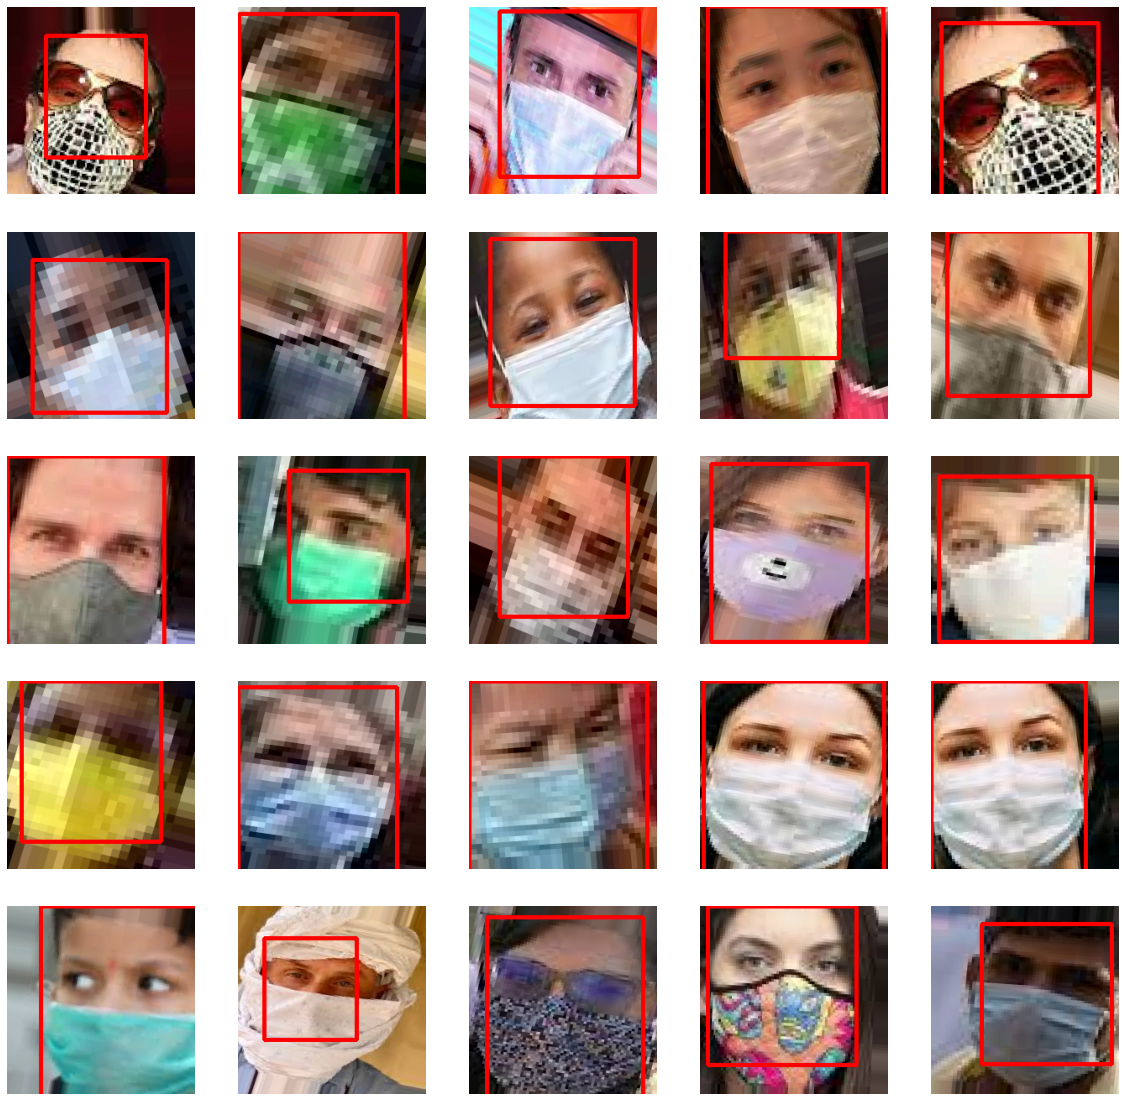

In [7]:
plt.figure(figsize=(20, 20))

for i in range(1 , 26):
  plt.subplot(5,5, i )
  plt.imshow(imgs[i - 1])
  plt.axis('off')

plt.show()

##**Individuals not Wearing Mask**

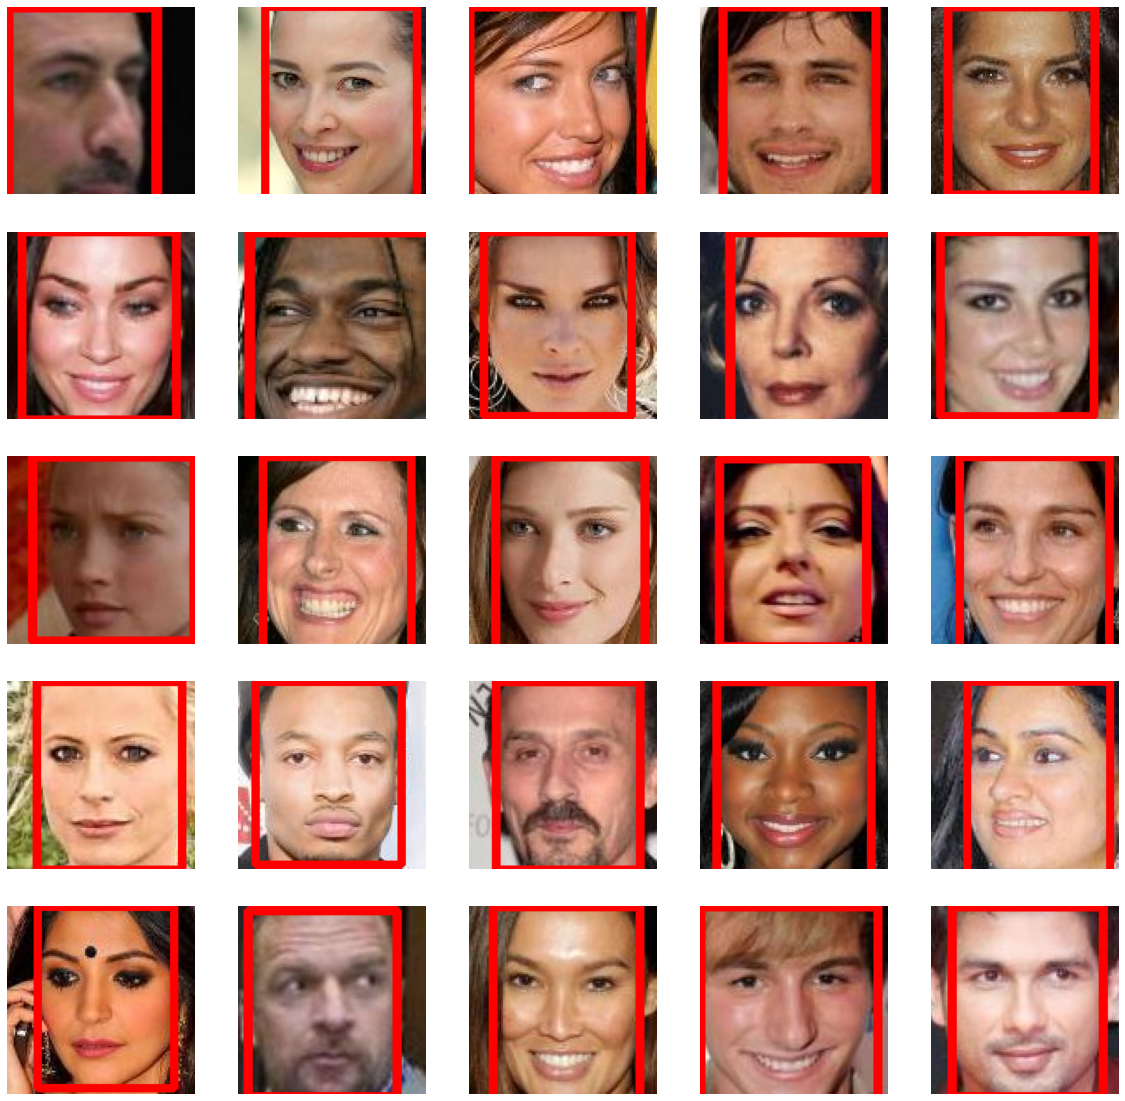

In [90]:
plt.figure(figsize=(20, 20))

for i in range(1 , 26):
  plt.subplot(5,5, i )
  plt.imshow(imgs_[i - 1])
  plt.axis('off')

plt.show()

# **Preprocessing**

In [9]:
datagen = ImageDataGenerator(rescale= 1./255)
train_data = datagen.flow_from_directory(train, target_size = (160,160),
                            color_mode = 'rgb', class_mode = 'binary' , shuffle = True)

val_data = datagen.flow_from_directory(validation, target_size = (160,160),
                            color_mode = 'rgb', class_mode = 'binary' , shuffle = True)

test_data = datagen.flow_from_directory(test, target_size = (160,160),
                            color_mode = 'rgb', class_mode = 'binary' , shuffle = True)

Found 10822 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


##**BaseLine Model (98 percemt of Accuracy)** 

In [10]:
model1 = Sequential()
model1.add(Conv2D(64,2, padding = 'same', 
                 input_shape = (160,160,3)))
model1.add(Activation('relu'))
model1.add(Conv2D(32, 2 , strides = 2, padding  = 'same'))
model1.add(Activation('relu'))
model1.add(MaxPool2D(pool_size = (2,2)))
model1.add(Conv2D(32, 2 , strides = 2, padding  = 'same'))
model1.add(Activation('relu'))
model1.add(MaxPool2D(pool_size = (2,2)))
model1.add(Dropout(.25))



model1.add(Flatten())
model1.add(Dense(64))
model1.add(Activation('relu'))
model1.add(Dropout(.33))
model1.add(Dense(1, activation= 'sigmoid'))

In [11]:
model1.compile('adam' , loss = 'binary_crossentropy', metrics = 'acc')

train_steps = train_data.n // train_data.batch_size
val_steps = val_data.n // val_data.batch_size


model1.fit_generator(train_data, steps_per_epoch= train_steps,
                     epochs = 3, verbose = 1,validation_steps = val_steps,
                     validation_data = val_data)

Epoch 1/3
338/338 [==============================] - 57s 130ms/step - loss: 0.2791 - acc: 0.8763 - val_loss: 0.0643 - val_acc: 0.9787
Epoch 2/3
338/338 [==============================] - 43s 126ms/step - loss: 0.0742 - acc: 0.9762 - val_loss: 0.0450 - val_acc: 0.9837
Epoch 3/3
338/338 [==============================] - 43s 126ms/step - loss: 0.0534 - acc: 0.9802 - val_loss: 0.0271 - val_acc: 0.9887


In [12]:
model1.evaluate_generator(test_data)[1]

0.9818548560142517

In [18]:
model1.save('model_mask_detection.h5')
model1.save_weights('model_mask_weights.h5')

##**Improving Our Model w TransferLearning and Callbacks**

In [13]:
models = {'Resnet50': ResNet50(include_top = False , classes = 2,input_shape = ((160,160,3))),
          'Resnet101':ResNet101(include_top = False , classes = 2,input_shape = ((160,160,3))),
          'InceptionV3':InceptionV3(include_top = False , classes = 2,input_shape = ((160,160,3))),
          'InceptionResnet':InceptionResNetV2(include_top = False , classes = 2,input_shape = ((160,160,3))),
          'VGG19':VGG19(include_top = False  , classes = 2,input_shape = ((160,160,3))),
          'VGG16':VGG16(include_top = False , classes = 2,input_shape = ((160,160,3)))}

58892288/58889256 [==============================] - 1s 0us/step


In [14]:
def step_decay(epoch):
   initial_lrate = 0.1
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate

Learning_Schedule = LearningRateScheduler(schedule = step_decay)
EarlyStop = EarlyStopping(monitor = 'val_loss', patience = 1 )

_______________________________________________________
_______________________________________________________


Training : Resnet50
Epoch 1/15
338/338 [==============================] - 50s 135ms/step - loss: 8.0510 - acc: 0.5319 - val_loss: 0.6955 - val_acc: 0.5000
Epoch 2/15
31/31 [==============================] - 3s 93ms/step - loss: 0.7059 - acc: 0.4869



31/31 [==============================] - 3s 91ms/step - loss: 0.7059 - acc: 0.4869
------> EvaluatingResnet50 : [0.70594322681427, 0.4868951737880707] Accuracy in Test_data


------------------- Resnet50 History ----------------------


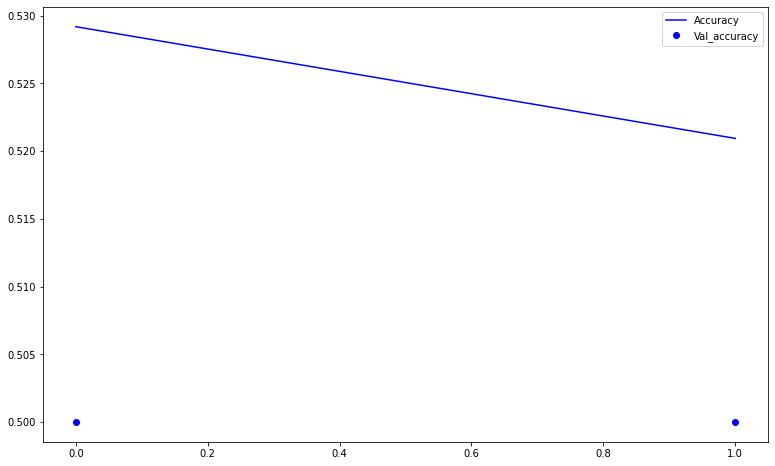

_______________________________________________________
_______________________________________________________


Training : Resnet101
Epoch 1/15
338/338 [==============================] - 57s 149ms/step - loss: 4.5778 - acc: 0.5212 - val_loss: 0.6983 - val_acc: 0.5000
Epoch 2/15
338/338 [==============================] - 50s 147ms/step - loss: 0.6904 - acc: 0.5402 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 3/15
31/31 [==============================] - 4s 112ms/step - loss: 0.6997 - acc: 0.4869



31/31 [==============================] - 4s 112ms/step - loss: 0.6997 - acc: 0.4869
------> EvaluatingResnet101 : [0.6997494697570801, 0.4868951737880707] Accuracy in Test_data


------------------- Resnet101 History ----------------------


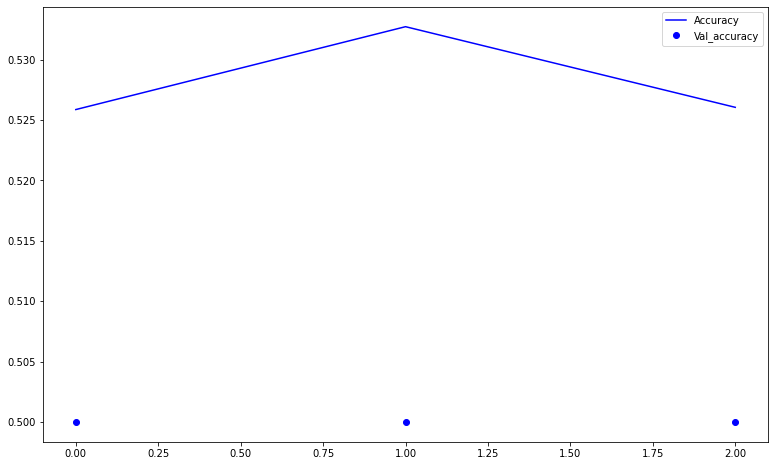

_______________________________________________________
_______________________________________________________


Training : InceptionV3
Epoch 1/15
338/338 [==============================] - 51s 137ms/step - loss: 36.7027 - acc: 0.5503 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/15
31/31 [==============================] - 3s 96ms/step - loss: 0.6940 - acc: 0.4869



31/31 [==============================] - 3s 94ms/step - loss: 0.6940 - acc: 0.4869
------> EvaluatingInceptionV3 : [0.6939932703971863, 0.4868951737880707] Accuracy in Test_data


------------------- InceptionV3 History ----------------------


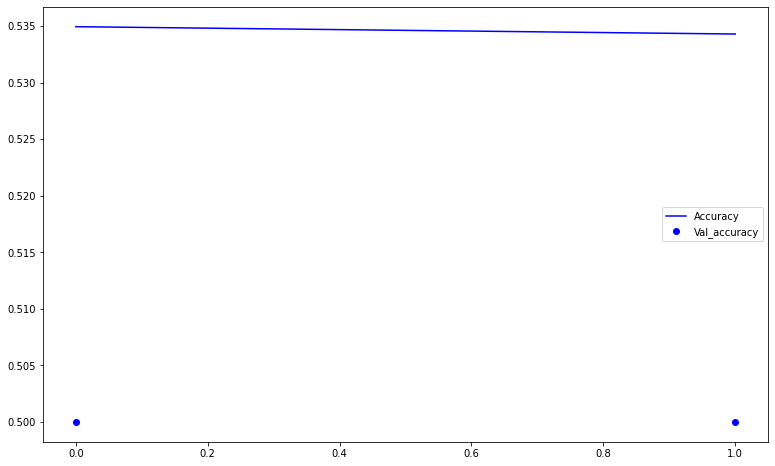

_______________________________________________________
_______________________________________________________


Training : InceptionResnet
Epoch 1/15
338/338 [==============================] - 67s 166ms/step - loss: 73.6342 - acc: 0.7275 - val_loss: 0.5943 - val_acc: 0.6388
Epoch 2/15
338/338 [==============================] - 53s 156ms/step - loss: 0.6027 - acc: 0.7817 - val_loss: 0.2816 - val_acc: 0.9200
Epoch 3/15
31/31 [==============================] - 4s 127ms/step - loss: 0.6950 - acc: 0.4869



31/31 [==============================] - 4s 126ms/step - loss: 0.6950 - acc: 0.4869
------> EvaluatingInceptionResnet : [0.6949882507324219, 0.4868951737880707] Accuracy in Test_data


------------------- InceptionResnet History ----------------------


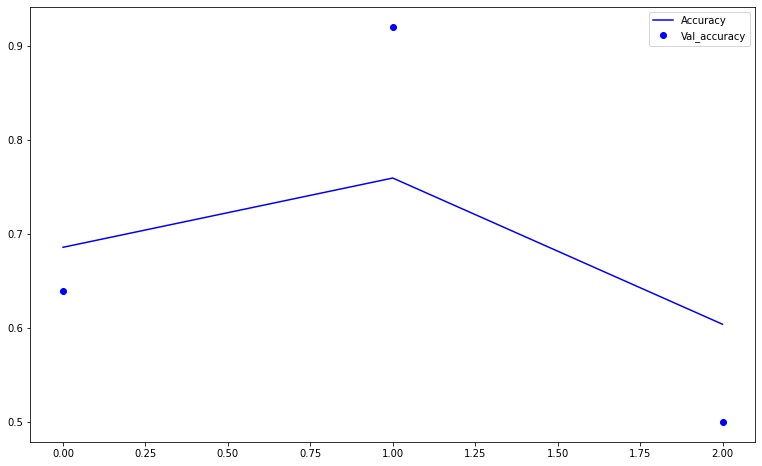

_______________________________________________________
_______________________________________________________


Training : VGG19
Epoch 1/15
338/338 [==============================] - 51s 136ms/step - loss: 13.5271 - acc: 0.5679 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 2/15
31/31 [==============================] - 3s 90ms/step - loss: 0.6955 - acc: 0.4869



31/31 [==============================] - 3s 91ms/step - loss: 0.6955 - acc: 0.4869
------> EvaluatingVGG19 : [0.6954831480979919, 0.4868951737880707] Accuracy in Test_data


------------------- VGG19 History ----------------------


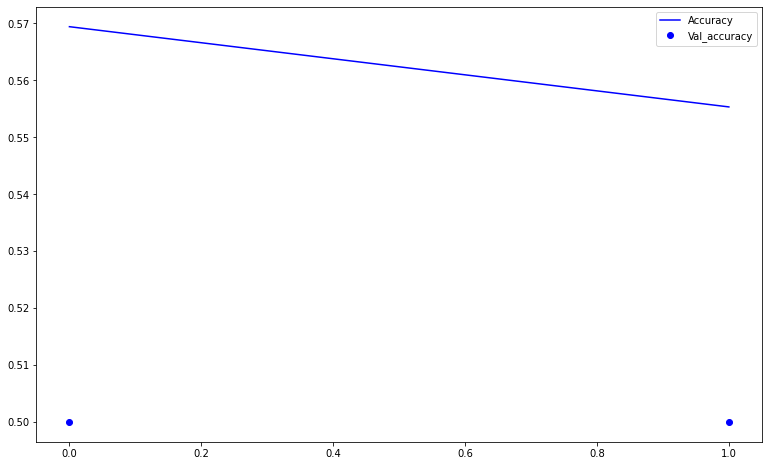

_______________________________________________________
_______________________________________________________


Training : VGG16
Epoch 1/15
338/338 [==============================] - 45s 129ms/step - loss: 8.8035 - acc: 0.5226 - val_loss: 0.7032 - val_acc: 0.5000
Epoch 2/15
31/31 [==============================] - 3s 89ms/step - loss: 0.7082 - acc: 0.4869



31/31 [==============================] - 3s 89ms/step - loss: 0.7082 - acc: 0.4869
------> EvaluatingVGG16 : [0.7081854343414307, 0.4868951737880707] Accuracy in Test_data


------------------- VGG16 History ----------------------


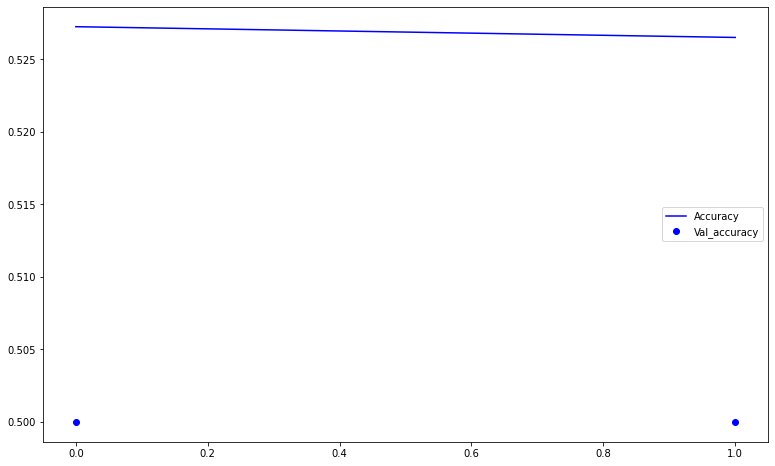

In [16]:
 
 
def build_model(base):
  model = Sequential()
  base.trainable = False
  model.add(base)
  model.add(Flatten())
  model.add(Dense(64, activation = 'relu'))
  model.add(Dropout(.25))
  model.add(Dense(32 , activation = 'relu'))
  model.add(Dropout(.25))
  model.add(Dense(1, activation = 'sigmoid'))
  return model 
 
 
name = [] 
val_test_data = [] 
 
for MODEL in models:
  print('_______________________________________________________')
  print('_______________________________________________________')
  print('\n')
  print('Training : {}'.format(MODEL))
  base = models[MODEL]
  model = build_model(base)
  model.compile(Adam(learning_rate = .1) , loss = 'binary_crossentropy', metrics = ['acc'])
  train_steps = train_data.n // train_data.batch_size
  val_steps = val_data.n // val_data.batch_size
  history = model.fit_generator(train_data,train_steps,epochs = 15,
                                validation_data = val_data,
                                validation_steps = val_steps,
                                callbacks = [Learning_Schedule,EarlyStop])
  
  eval = model.evaluate(test_data)
  print('\n\n')
  print('------> Evaluating{} : {} Accuracy in Test_data'.format(MODEL,model.evaluate(test_data)))
  print('\n')
  print('------------------- {} History ----------------------'.format(MODEL))
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  plt.figure(figsize = (13,8))
 
 
 
  plt.plot(range(0,len(acc)), acc,'b' ,label = 'Accuracy')
  plt.plot(val_acc ,'bo', label = 'Val_accuracy')
  plt.legend()
  plt.show()
  name.append(MODEL)
  val_test_data.append(eval[1])

In [19]:
name.append('Our model')
val_test_data.append(model1.evaluate_generator(test_data)[1])

In [20]:
results = pd.DataFrame({'models':name , 'accuracy':val_test_data})
results

,models,accuracy
0,Resnet50,0.486895
1,Resnet101,0.486895
2,InceptionV3,0.486895
3,InceptionResnet,0.486895
4,VGG19,0.486895
5,VGG16,0.486895
6,Our model,0.981855


In [21]:
results = results.sort_values(by = 'accuracy' , ascending = False)
results

,models,accuracy
6,Our model,0.981855
0,Resnet50,0.486895
1,Resnet101,0.486895
2,InceptionV3,0.486895
3,InceptionResnet,0.486895
4,VGG19,0.486895
5,VGG16,0.486895


Text(0, 0.5, ' ')

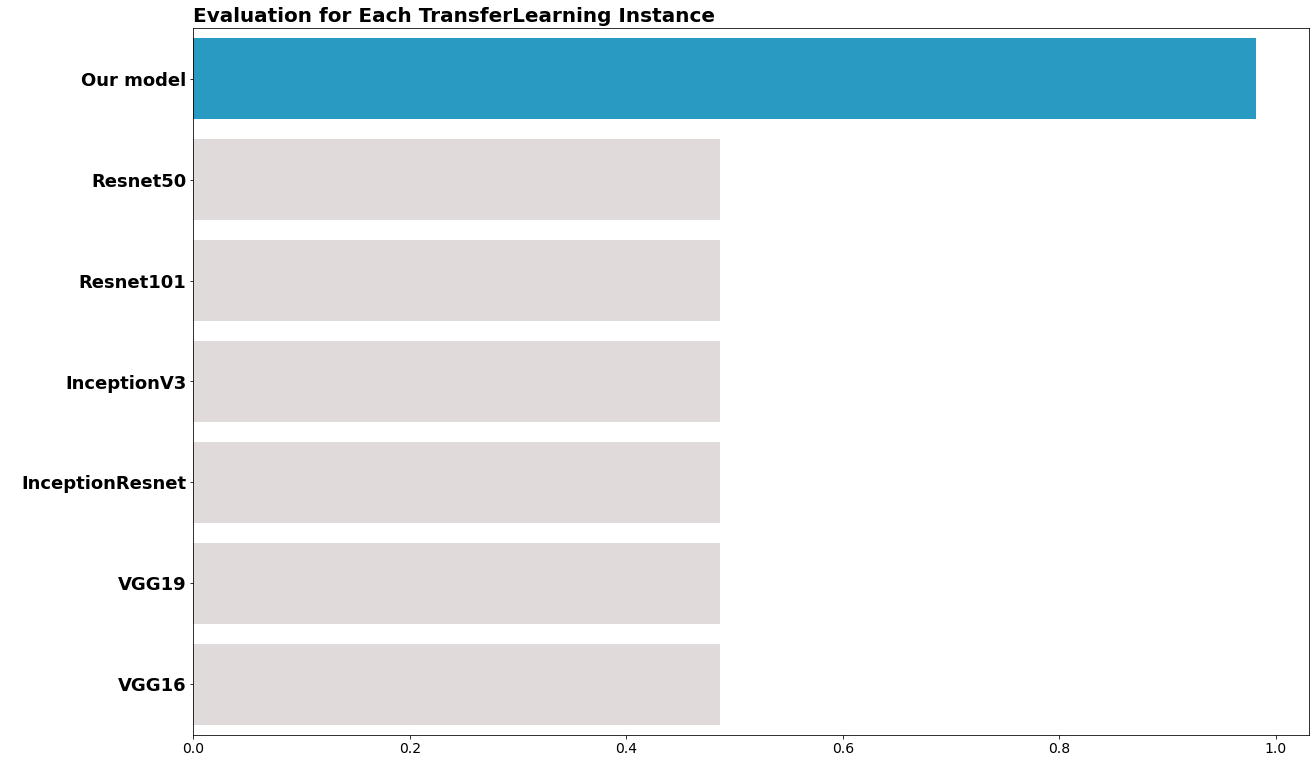

In [26]:
k = ['#0FA7DB' , '#E1D9DB' ,'#E1D9DB','#E1D9DB','#E1D9DB','#E1D9DB','#E1D9DB','#E1D9DB']

plt.figure(figsize = (20,13))
sns.barplot(x = results.accuracy , y = results.models, palette = k)
plt.xticks(size = 14)
plt.yticks(size = 18 , weight = 'bold')
plt.title('Evaluation for Each TransferLearning Instance' , fontsize = 20 , weight = 'bold' , loc = 'left')
plt.xlabel(' ')
plt.ylabel(' ')

In [62]:
train_data.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

## **Extracting Information from Wild-type data to Model Evaluation**

In [63]:
wild_image = [] 
cropped = [] 


def pre_processing(image):
   img = cv2.imread(image)
   
   img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
   face_detector = MTCNN()
   faces = face_detector.detect_faces(img_rgb)
   

   for face in faces:
     x,y,w,h  = face['box']
     crop = img_rgb[y:y + h , x:x + w]
     crop = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
     cropped.append(crop)
     cv2.imwrite('/content/drive/MyDrive/Datasets/opencv/face_test/crop.jpg', crop)
     my_image = load_img('/content/drive/MyDrive/Datasets/opencv/face_test/crop.jpg' ,
                                             target_size = (160,160))
     my_image = img_to_array(my_image)
     my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
     preds = model1.predict_classes(my_image)
     print(preds)
     if preds == 1:
      cv2.rectangle(img_rgb , (x , y) , (x + w , y + h) , (255,0,0) , 3)
      cv2.putText(img ,'Wearing Mask', (x , y + h  ), cv2.FONT_HERSHEY_SIMPLEX, 1 , (255,255,255) , 20)
      imgs.append(img_rgb)
      wild_image.append(img_rgb)
     if preds == 0:
      cv2.rectangle(img_rgb , (x , y) , (x + w , y + h) , (0,255,0) , 3)
      cv2.putText(img ,'NOT Wearing Mask', (x , y + h  ), cv2.FONT_HERSHEY_SIMPLEX, 1 , (255,255,255) , 20)
      imgs.append(img_rgb)
      wild_image.append(img_rgb)



In [64]:
pre_processing('/content/drive/MyDrive/Datasets/opencv/face_test/test1.jpg')

[[1]]
[[0]]


In [ ]:
wild_image

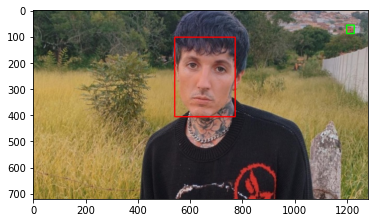

In [66]:

plt.imshow(wild_image[0])

In [67]:
pre_processing('/content/drive/MyDrive/Datasets/opencv/face_test/test2.jpg')

[[0]]
[[0]]


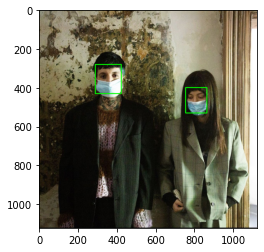

In [70]:
plt.imshow(wild_image[2])

In [ ]:
pred = model1.predict_classes(test_data)
pred

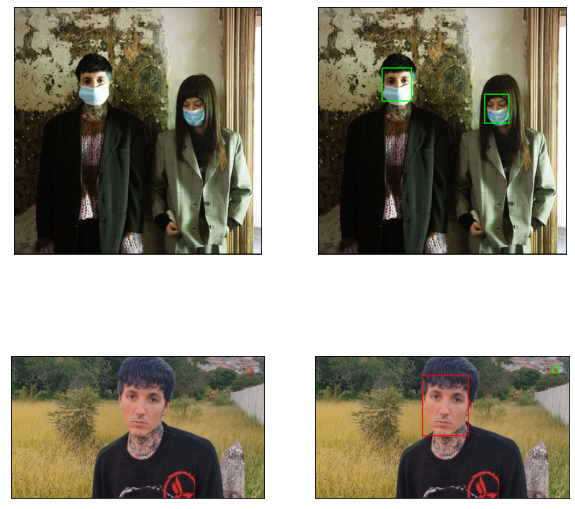

<Figure size 432x288 with 0 Axes>

In [89]:
plt.figure(figsize = (10 , 10))
plt.subplot(2,2,1)
plt.imshow(Image.open('/content/drive/MyDrive/Datasets/opencv/face_test/test2.jpg'))
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(wild_image[2])
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(Image.open('/content/drive/MyDrive/Datasets/opencv/face_test/test1.jpg'))
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(wild_image[0])
plt.xticks([])
plt.yticks([])
plt.show()

plt.savefig('demonstration.jpg')